### K Means Clustering Unsupervised Learning


### Importing  Necessary Library


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = ["sepal_length" ,"sepal_width" ,"petal_length" ,"petal_width"])
df.head() 

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
print("Shape : {} and Size : {} of the dataset".format(df.shape,df.size))

Shape : (150, 4) and Size : 600 of the dataset


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


### Exploratory Data analysis


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


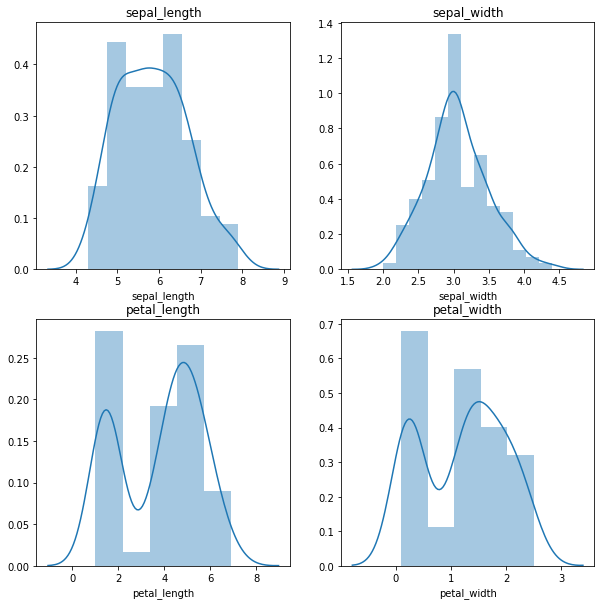

In [6]:
a = 1
fig = plt.figure(figsize = (10,10)) 
for var in df.columns:
   ax = fig.add_subplot(2,2,a)
   sns.distplot(df[var] , ax = ax )
   plt.title(var)
   a = a + 1
plt.show()


### Outlier 


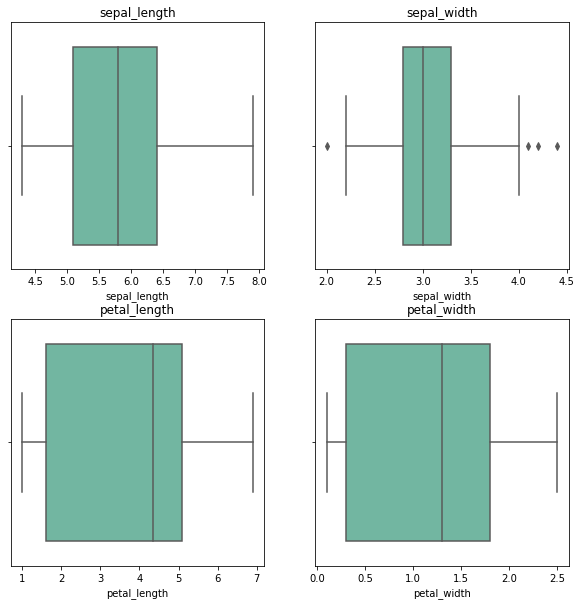

In [7]:
a = 1
fig = plt.figure(figsize = (10,10)) 
for var in df.columns:
   ax = fig.add_subplot(2,2,a)
   sns.boxplot(df[var] , ax = ax ,palette = "Set2" )
   plt.title(var)
   a = a + 1
plt.show()


In this Above code Sepal width have some outlier in feature sepal width

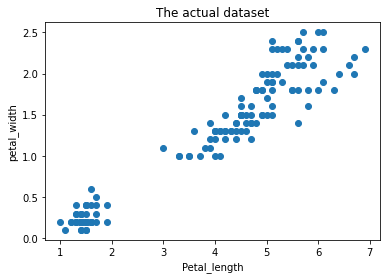

In [8]:
plt.scatter(x=df.petal_length,y=df.petal_width)
plt.title("The actual dataset") 
plt.xlabel("Petal_length")
plt.ylabel("petal_width")
plt.show()
#petal length and petal width is linearly related

### Correlation
In this Analysis the Feature Petal length and petal width is Highly correlated (0.96)


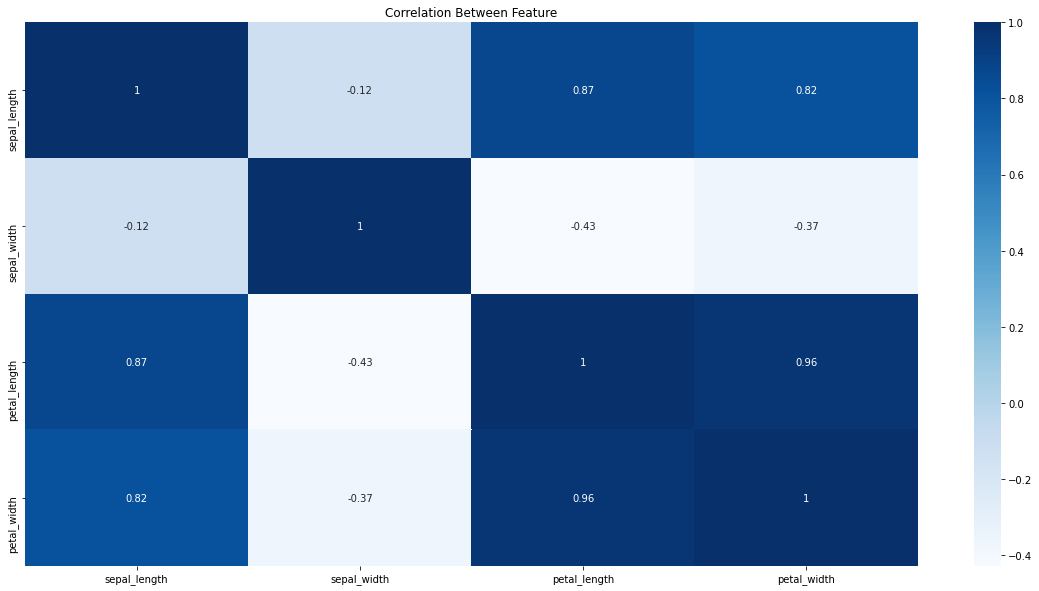

In [9]:
corr = df.corr()
plt.figure(figsize = (20 ,10))
sns.heatmap(corr , annot = True  ,cmap = "Blues")
plt.title("Correlation Between Feature")
plt.show()

### Multi varient Analysis

<Figure size 1440x720 with 0 Axes>

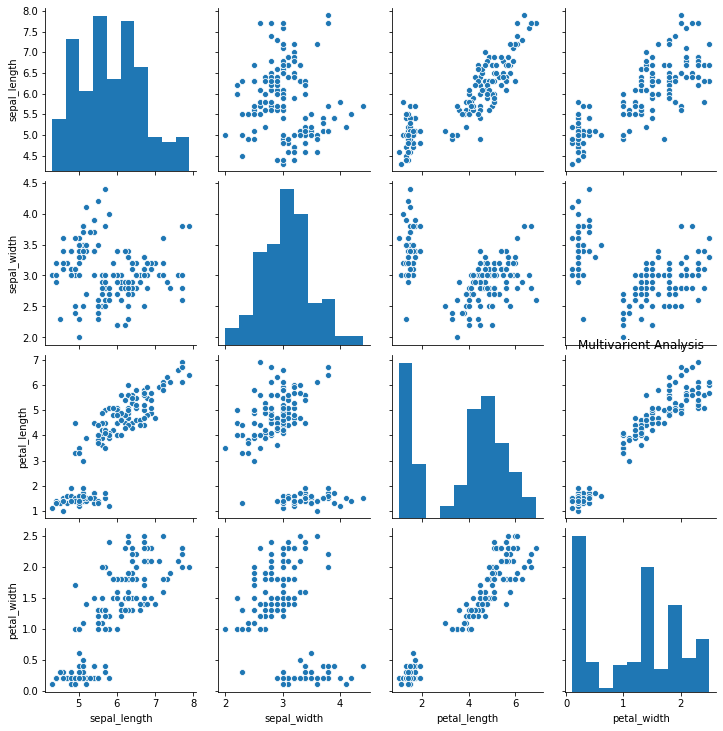

In [10]:
plt.figure(figsize = (20,10))
sns.pairplot(df)
plt.title("Multivarient Analysis")
plt.show()

In [11]:
x = df.iloc[:,0:].values


In [12]:
from sklearn.cluster import KMeans
wsc = []
for i in range(1, 20): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wsc.append(kmeans.inertia_)


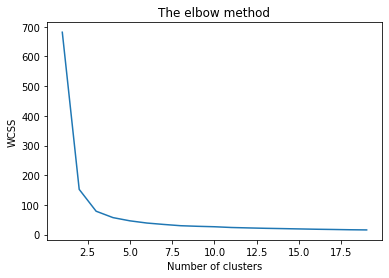

In [13]:
plt.plot(range(1, 20), wsc)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [14]:
x_kmeans = KMeans(n_clusters = 3 ,init = "k-means++" , n_init = 10 , max_iter = 300 ,random_state = 0)
kmean = x_kmeans.fit_predict(x)
print(x_kmeans.cluster_centers_)
print("Cluster labels")
print(x_kmeans.labels_)



[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]
Cluster labels
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


### Visualization Cluster

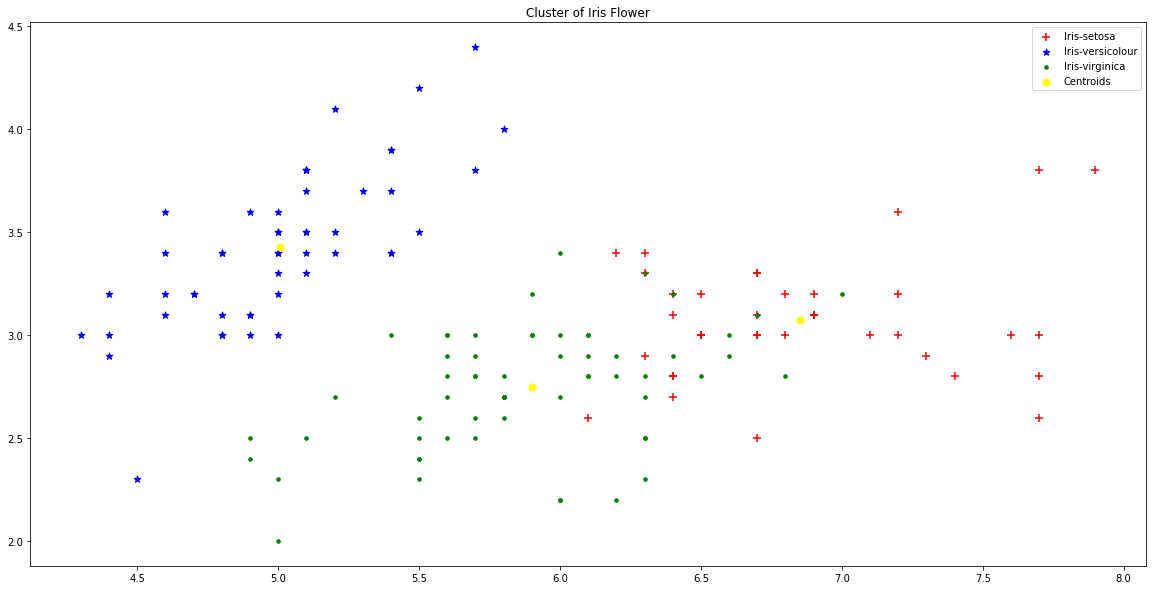

In [15]:

plt.figure(figsize = (20 ,10))
plt.scatter(x[kmean == 0, 0], x[kmean == 0, 1], s = 50, c = 'red', marker = "+" ,label = 'Iris-setosa')
plt.scatter(x[kmean == 1, 0], x[kmean == 1, 1], s = 50, c = 'blue',marker = "*", label = 'Iris-versicolour')
plt.scatter(x[kmean == 2, 0], x[kmean == 2, 1],s = 50, c = 'green',marker = "." ,label = 'Iris-virginica')
plt.scatter(x_kmeans.cluster_centers_[:, 0], x_kmeans.cluster_centers_[:,1], s = 50, c = 'yellow', label = 'Centroids')
plt.title("Cluster of Iris Flower")
plt.legend()
plt.show()